# Dataset: Credit Card Customer Information

A manager at the bank is disturbed with more and more customers leaving their credit card services. What we are doing here is to predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

# Looking at the dataset at first glance

Loading the dataset into jupyter notebook for visualization.

In [1]:
import pandas as pd

df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# First step in preprocessing the dataset

Since the last two columns is about Naive Bayes predictions, so it is removed.<br>
Dropping "CLIENTNUM" because it is the customers' ID from the bank's perspective.

In [2]:
df = df.drop(columns = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Pie chart to see what we are dealing with

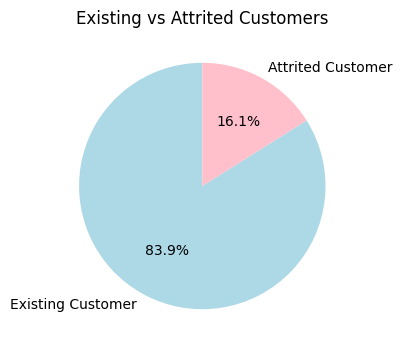

In [4]:
import matplotlib.pyplot as plt

target_column = df.columns[0]

customer_counts = df[target_column].value_counts()

plt.figure(figsize=(4,4))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)
plt.title("Existing vs Attrited Customers")
plt.show()

# Histogram

**Generating graphs to help us better visualize the dataset**

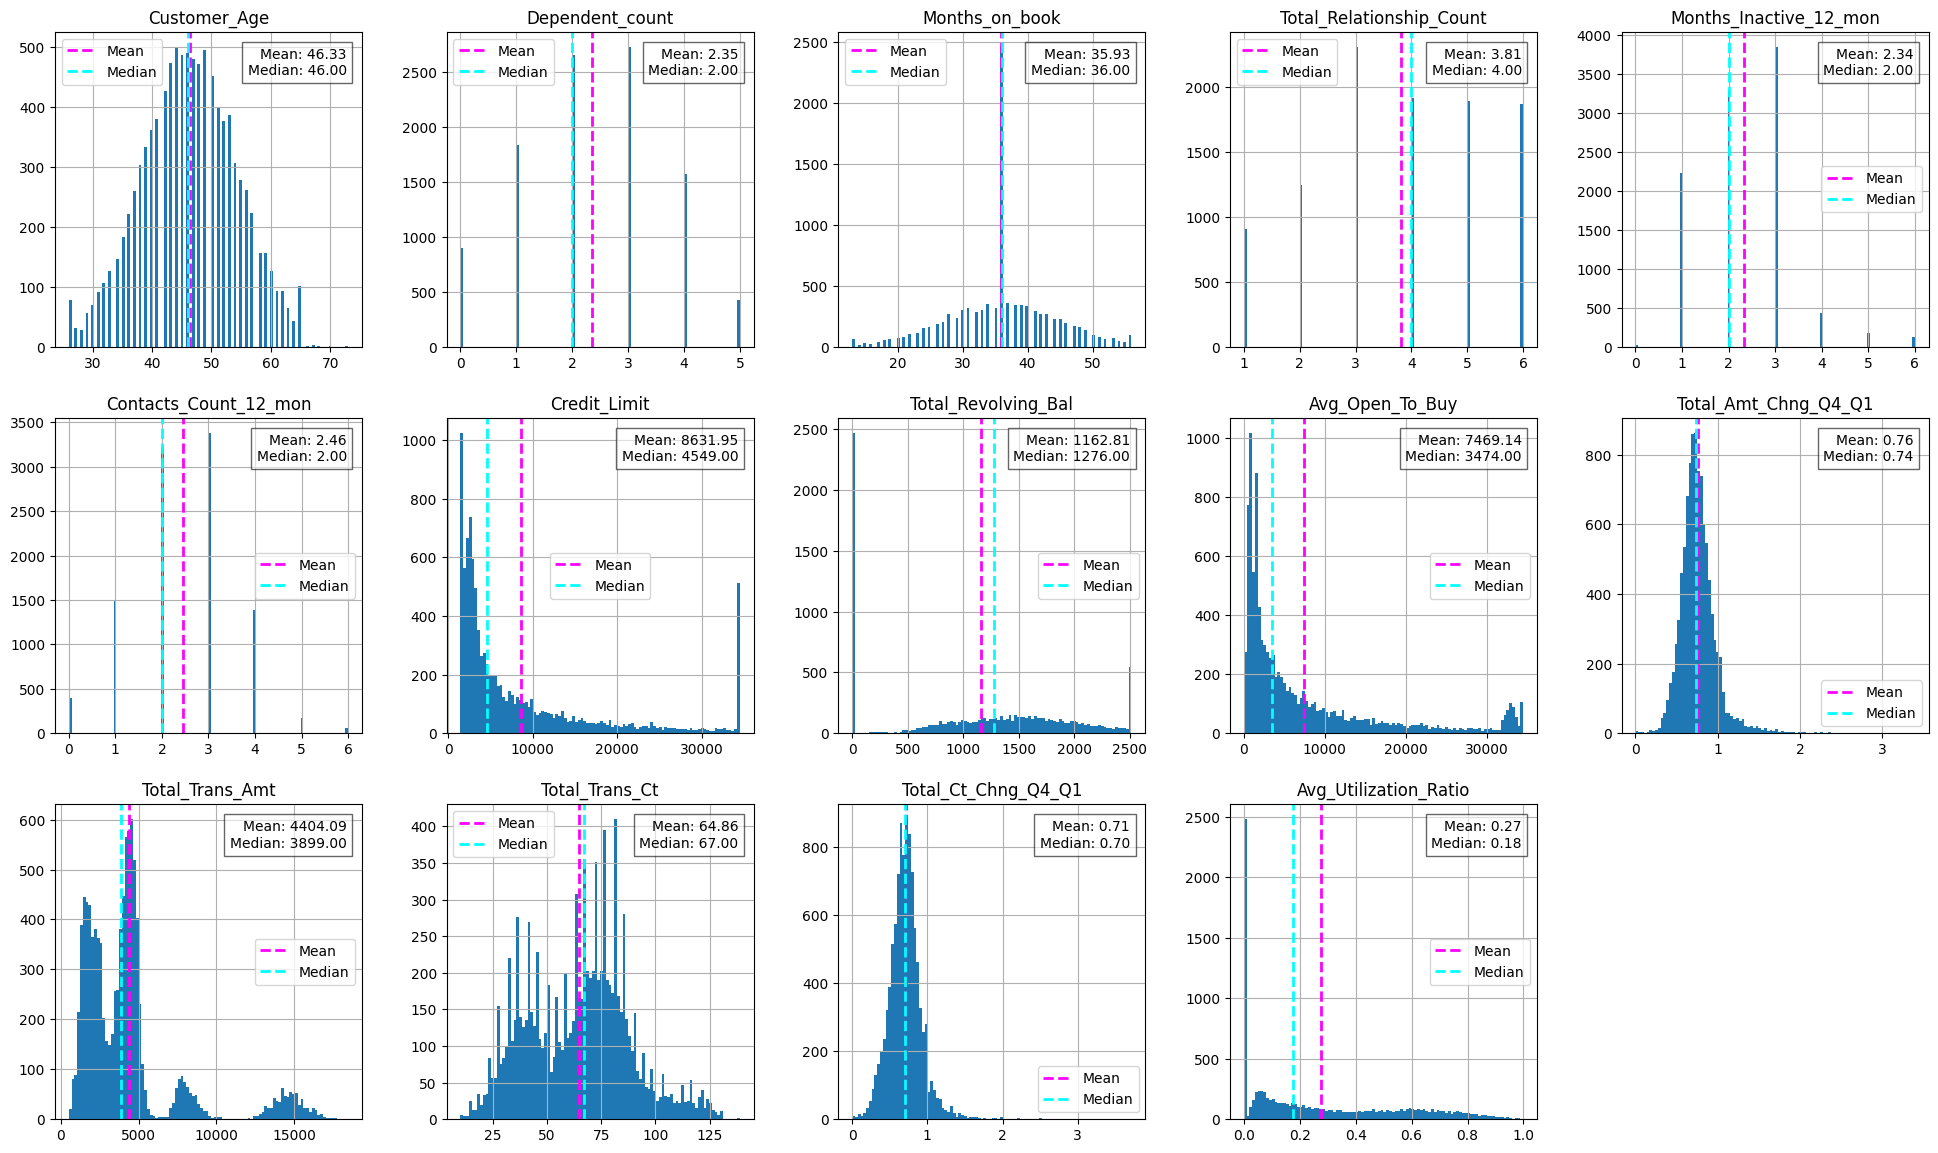

In [5]:
import matplotlib.pyplot as plt

def plot_histogram(df, col, ax):
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    mean_val = feature.mean()
    median_val = feature.median()
    mean_line = ax.axvline(mean_val, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    median_line = ax.axvline(median_val, color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    # Add text for mean and median for easier interpretation
    ax.text(0.95, 0.95, f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.6))
    ax.legend(handles=[mean_line, median_line])

numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

num_features = len(numeric_features)
num_rows = (num_features + 5) // 6  # Ensures there's enough rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, col in enumerate(numeric_features):
    plot_histogram(df, col, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

**What we conclude with the histogram** <br>
1. Most features exhibit right-skewed distributions, including Credit_Limit, Total_Trans_Amt, and Avg_Open_To_Buy, indicating that a small group of customers have significantly higher values.

2. Customer_Age follows a near-normal distribution, with most customers between 40-50 years old, making them the primary demographic.

3. Dependent_count is left-skewed, as most customers have 1-3 dependents, while few have 4-5.

4. Transaction-related features (Total_Trans_Amt, Total_Trans_Ct) show a broad range, with some customers being highly active while others have minimal usage.

5. Avg_Utilization_Ratio is highly skewed, with most customers using a small portion of their credit, but some maxing out their limits.
___________

# Boxplot

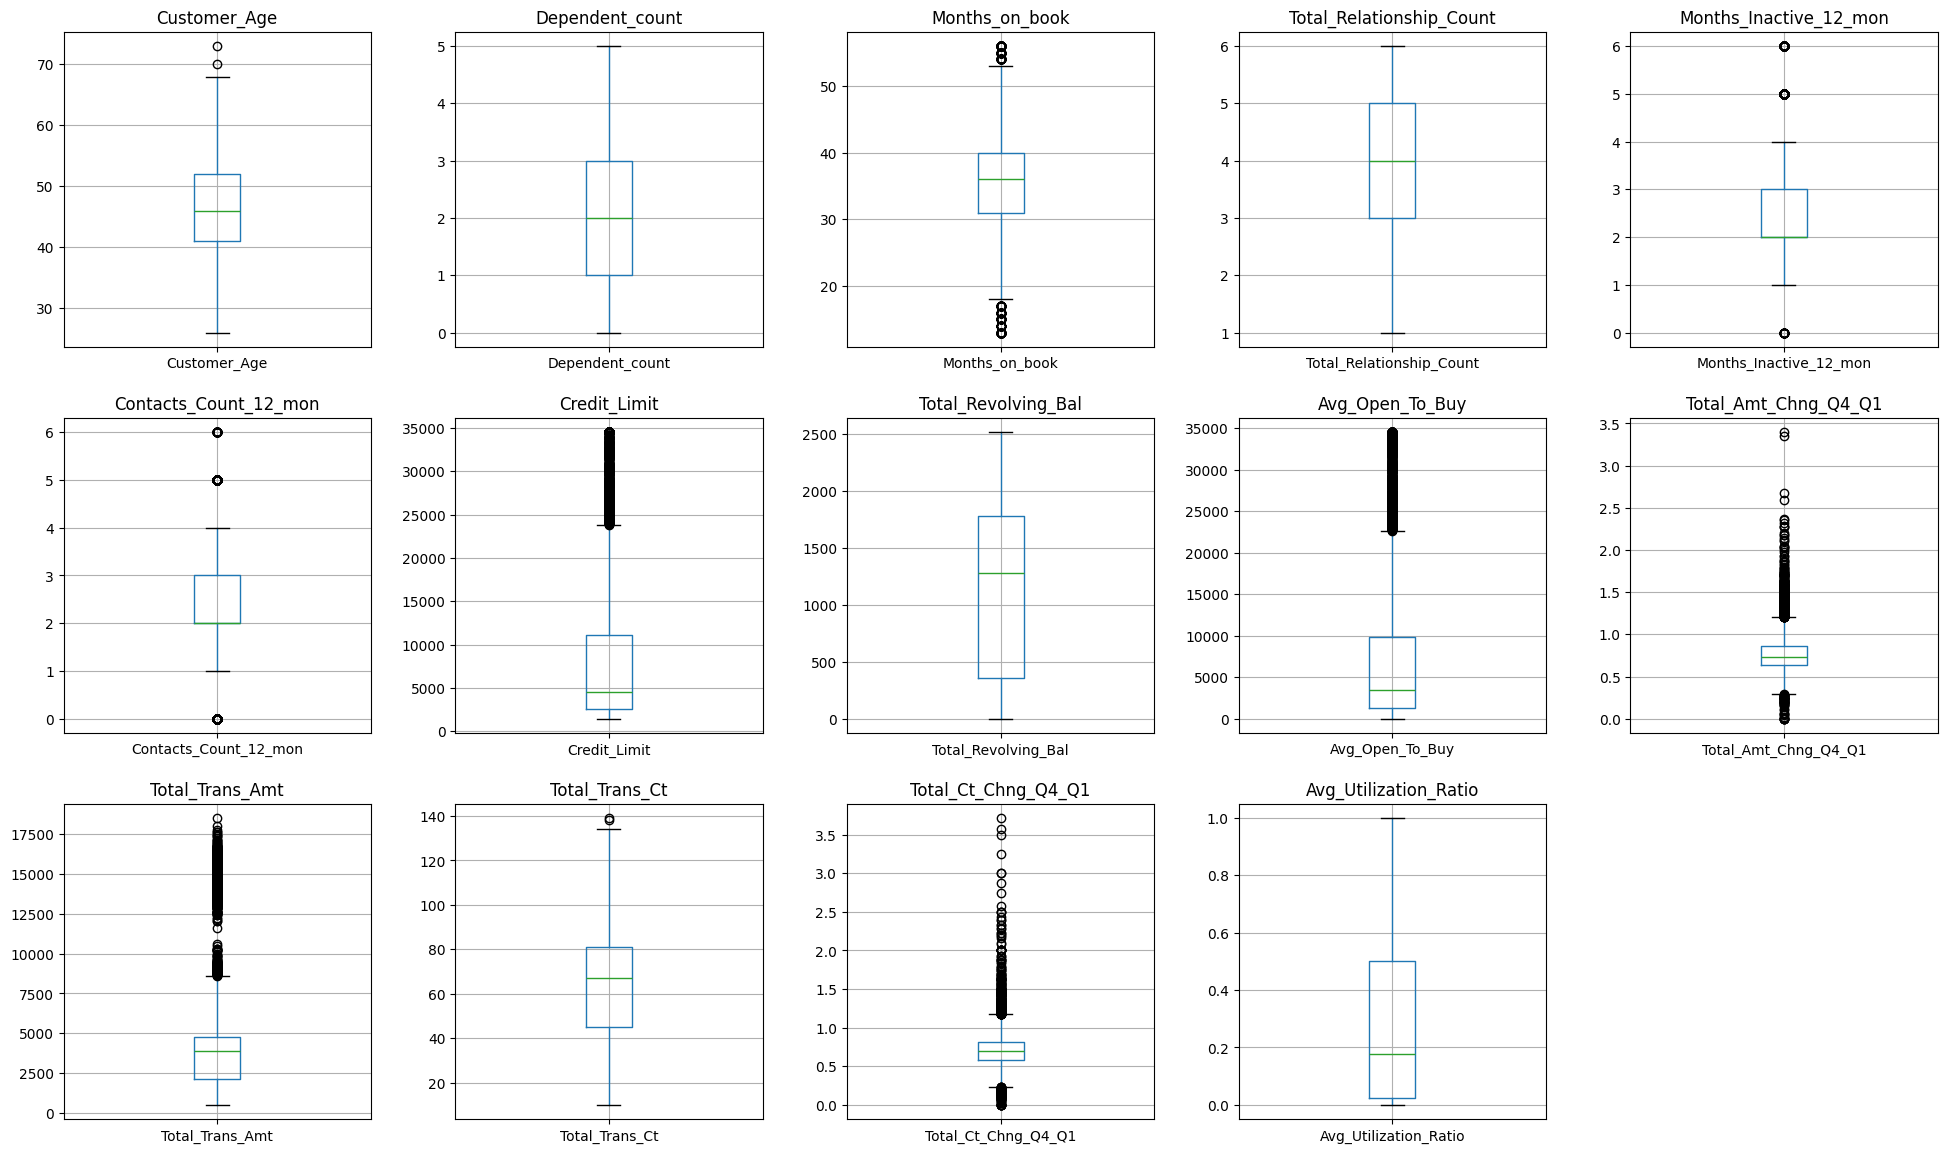

In [6]:
def plot_boxplot(df, col, ax):  # Function to create a boxplot
    df.boxplot(column=col, ax=ax)  # Create a boxplot for the column
    ax.set_title(col)
    
# Ensure the columns exist in the DataFrame
numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
                    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

# Calculate the number of rows needed for 6 plots per line
num_features = len(numeric_features)
num_rows = (num_features + 5) // 6  # Ensures we have enough rows

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature as a boxplot
for i, col in enumerate(numeric_features):
    plot_boxplot(df, col, axes[i])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

**What we conclude with the boxplots** <br>
1. Significant outliers exist in financial features such as Credit_Limit, Total_Trans_Amt, and Total_Amt_Chng_Q4_Q1, suggesting that some customers have extreme spending or credit behaviors.

2. Customer_Age and Dependent_count have no major outliers, confirming stable distributions.

3. Transaction-related features exhibit high variability, meaning spending patterns vary widely among customers.

4. Avg_Utilization_Ratio shows extreme values close to 1.0, indicating that some customers are heavily reliant on their credit.

___

# Barchart

**The bar charts provide insights into the relationship between categorical features and customer attrition.**

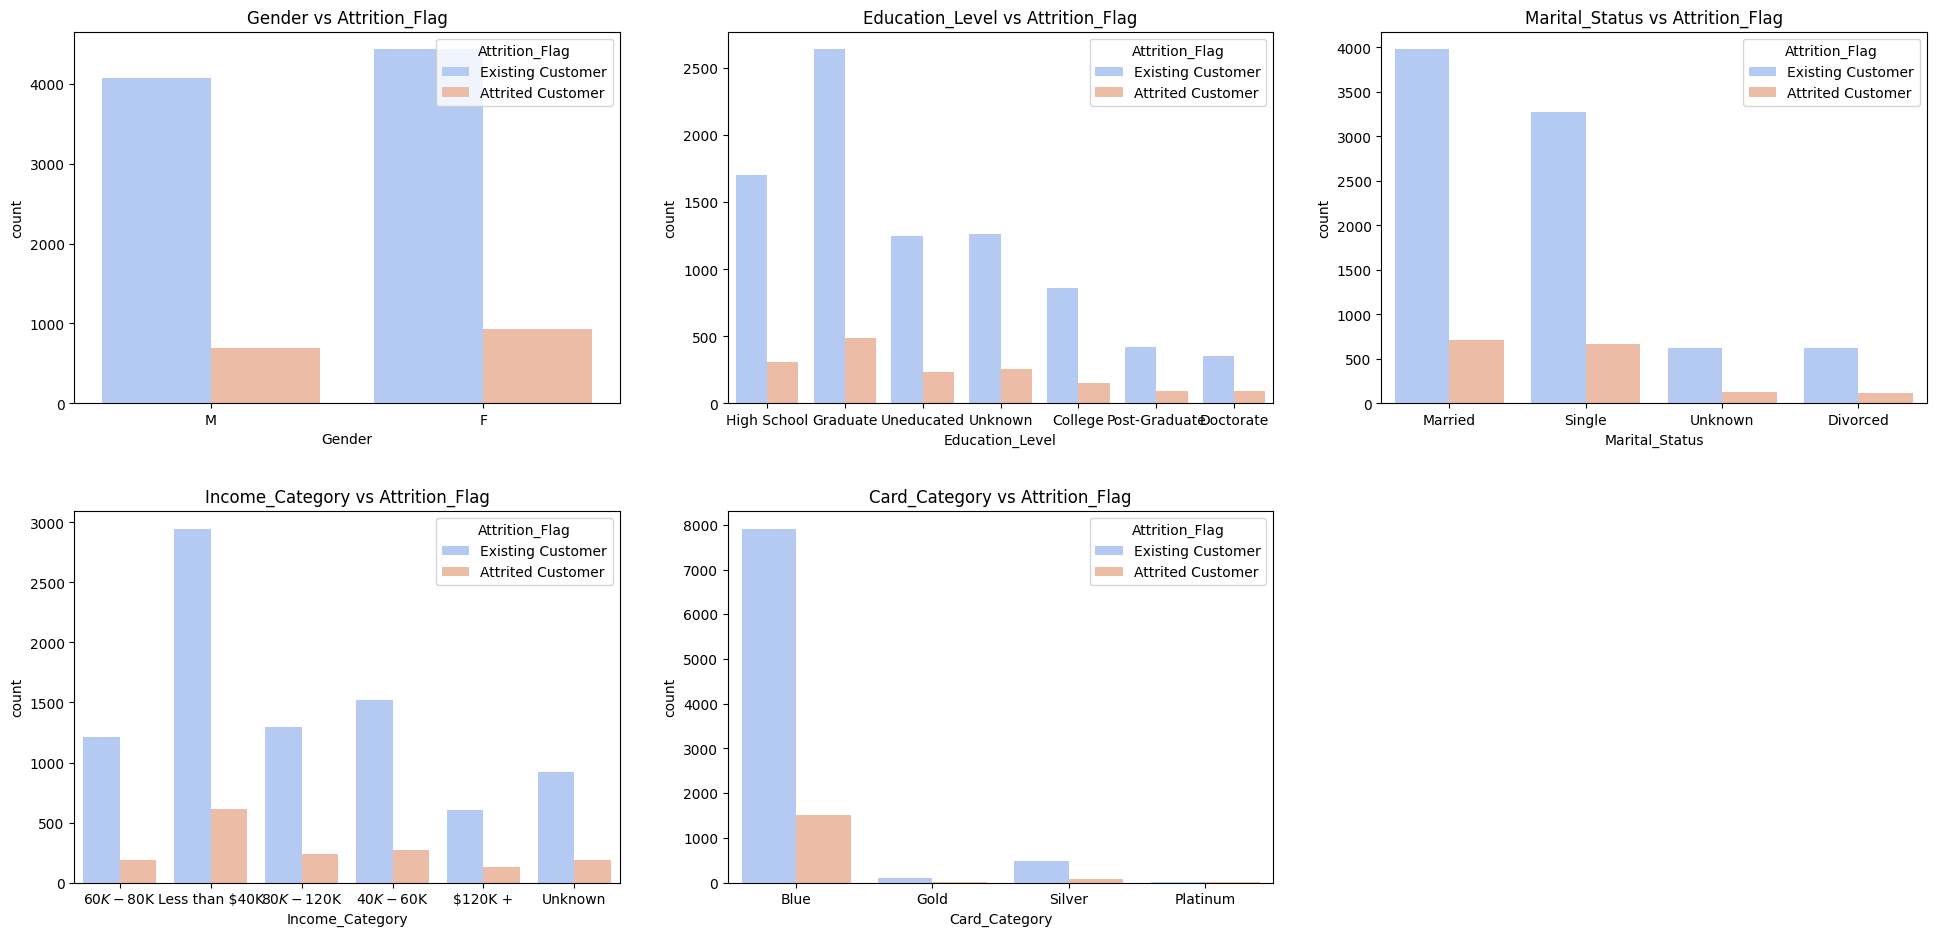

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create a figure with subplots
plt.figure(figsize = (20, 10))

# Loop through each feature and create a count plot
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)  # Create a subplot in a 2x3 grid
    ax = sns.countplot(data=df, x=feature, hue='Attrition_Flag', palette='coolwarm')  # Create a count plot with hue as Attrition_Flag
    ax.set_title(f'{feature} vs Attrition_Flag')

# Adjust layout for better spacing
plt.tight_layout(pad = 3.0)
plt.show()

**What we conclude with the barcharts** <br>

Gender vs Attrition_Flag:
1. The attrition rate is similar between male and female customers, indicating that gender does not have a strong impact on customer churn.


Education_Level vs Attrition_Flag:
1. The majority of customers hold a Graduate or High School education, and most churned customers fall into these categories.
2. Customers with a Doctorate or no formal education (Uneducated) tend to have lower churn rates, possibly due to different spending behaviors or financial stability.


Marital_Status vs Attrition_Flag:
1. Married customers make up the largest group, but they also have a significant number of churned customers, suggesting marital status is not a strong churn predictor.
2. Customers with “Unknown” marital status show a lower churn rate, which could be influenced by data collection biases.


Income_Category vs Attrition_Flag:
1. Lower-income customers (Less than $40K) have the highest attrition rates, indicating that financial constraints might make them more likely to stop using the service.
2. High-income customers ($120K+) have lower churn rates, possibly due to greater financial stability and sustained credit usage.


Card_Category vs Attrition_Flag:
1. The majority of customers use the "Blue" credit card, and most churned customers come from this category.
2. Premium cardholders (Platinum, Gold, Silver) are fewer in number and show lower churn rates, suggesting that high-tier customers may have stronger loyalty or receive better retention incentives.


Conclusion:<br>
Based on the bar charts, Card Type (Card_Category) and Income Level (Income_Category) seem to have the most significant impact on customer attrition.
___

# Preprocessing the dataset

**Check and fill missing data**

In [8]:
missing_data = df.isnull().sum()
print(missing_data)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


As we can see there is no missing values in the dataset. <br>

_______

**Transformation of features**

Here we are transforming categorical features.

In [9]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features excluding the target 'Attrition_Flag'
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create a copy of the dataframe to avoid modifying the original data
df_encoded = df.copy()

# Apply LabelEncoder to each categorical feature
label_encoders = {}
for feature in categorical_features:
    labelEncoder = LabelEncoder()
    df_encoded[feature] = labelEncoder.fit_transform(df_encoded[feature])
    label_encoders[feature] = labelEncoder

# Convert Attrition_Flag (Target Variable) to 0 and 1
label_encoder_attrition = LabelEncoder()
df_encoded['Attrition_Flag'] = label_encoder_attrition.fit_transform(df_encoded['Attrition_Flag'])

# Store the encoder for future use (optional)
label_encoders['Attrition_Flag'] = label_encoder_attrition

# make sure all data are numeric
print(df_encoded.dtypes)
df_encoded.head() 

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


**Result:**<br>
**Before the transformation** <br>
Attrition_Flag was defined as "Attrited Customer" & "Existing Customer". <br>
Gender was defined as "Female" & "Male".<br>
Education_Level was defined as "College", "Doctorate", "Graduated", "High School", "Post-Graduate", "Uneducated", "Unknown". <br>
Marital_Status was defined as "Divorced", "Married", "Single", "Unknown". <br>
Income_Category was defined as "$120K +", "$40K - $60K", "$60K - $80K", "$80K - $120K", "Less than $40K", "Unknown". <br>
Card_Category was defined as "Blue", "Gold", "Silver". <br>

**After the transformation (feature value is transformed respectfully)** <br>
Attrition_Flag was defined as "0" & "1". <br>
Gender was defined as "0" & "1".<br>
Education_Level was defined as "0", "1", "2", "2", "3", "4", "5". <br>
Marital_Status was defined as "0", "1", "2", "3". <br>
Income_Category was defined as "0","1", "2", "3", "4", "5". <br>
Card_Category was defined as "0", "1", "2". <br>
_______

# Correlation Matrix

**The reason we created a correlation matrix is to easier visualize the correlation between features**

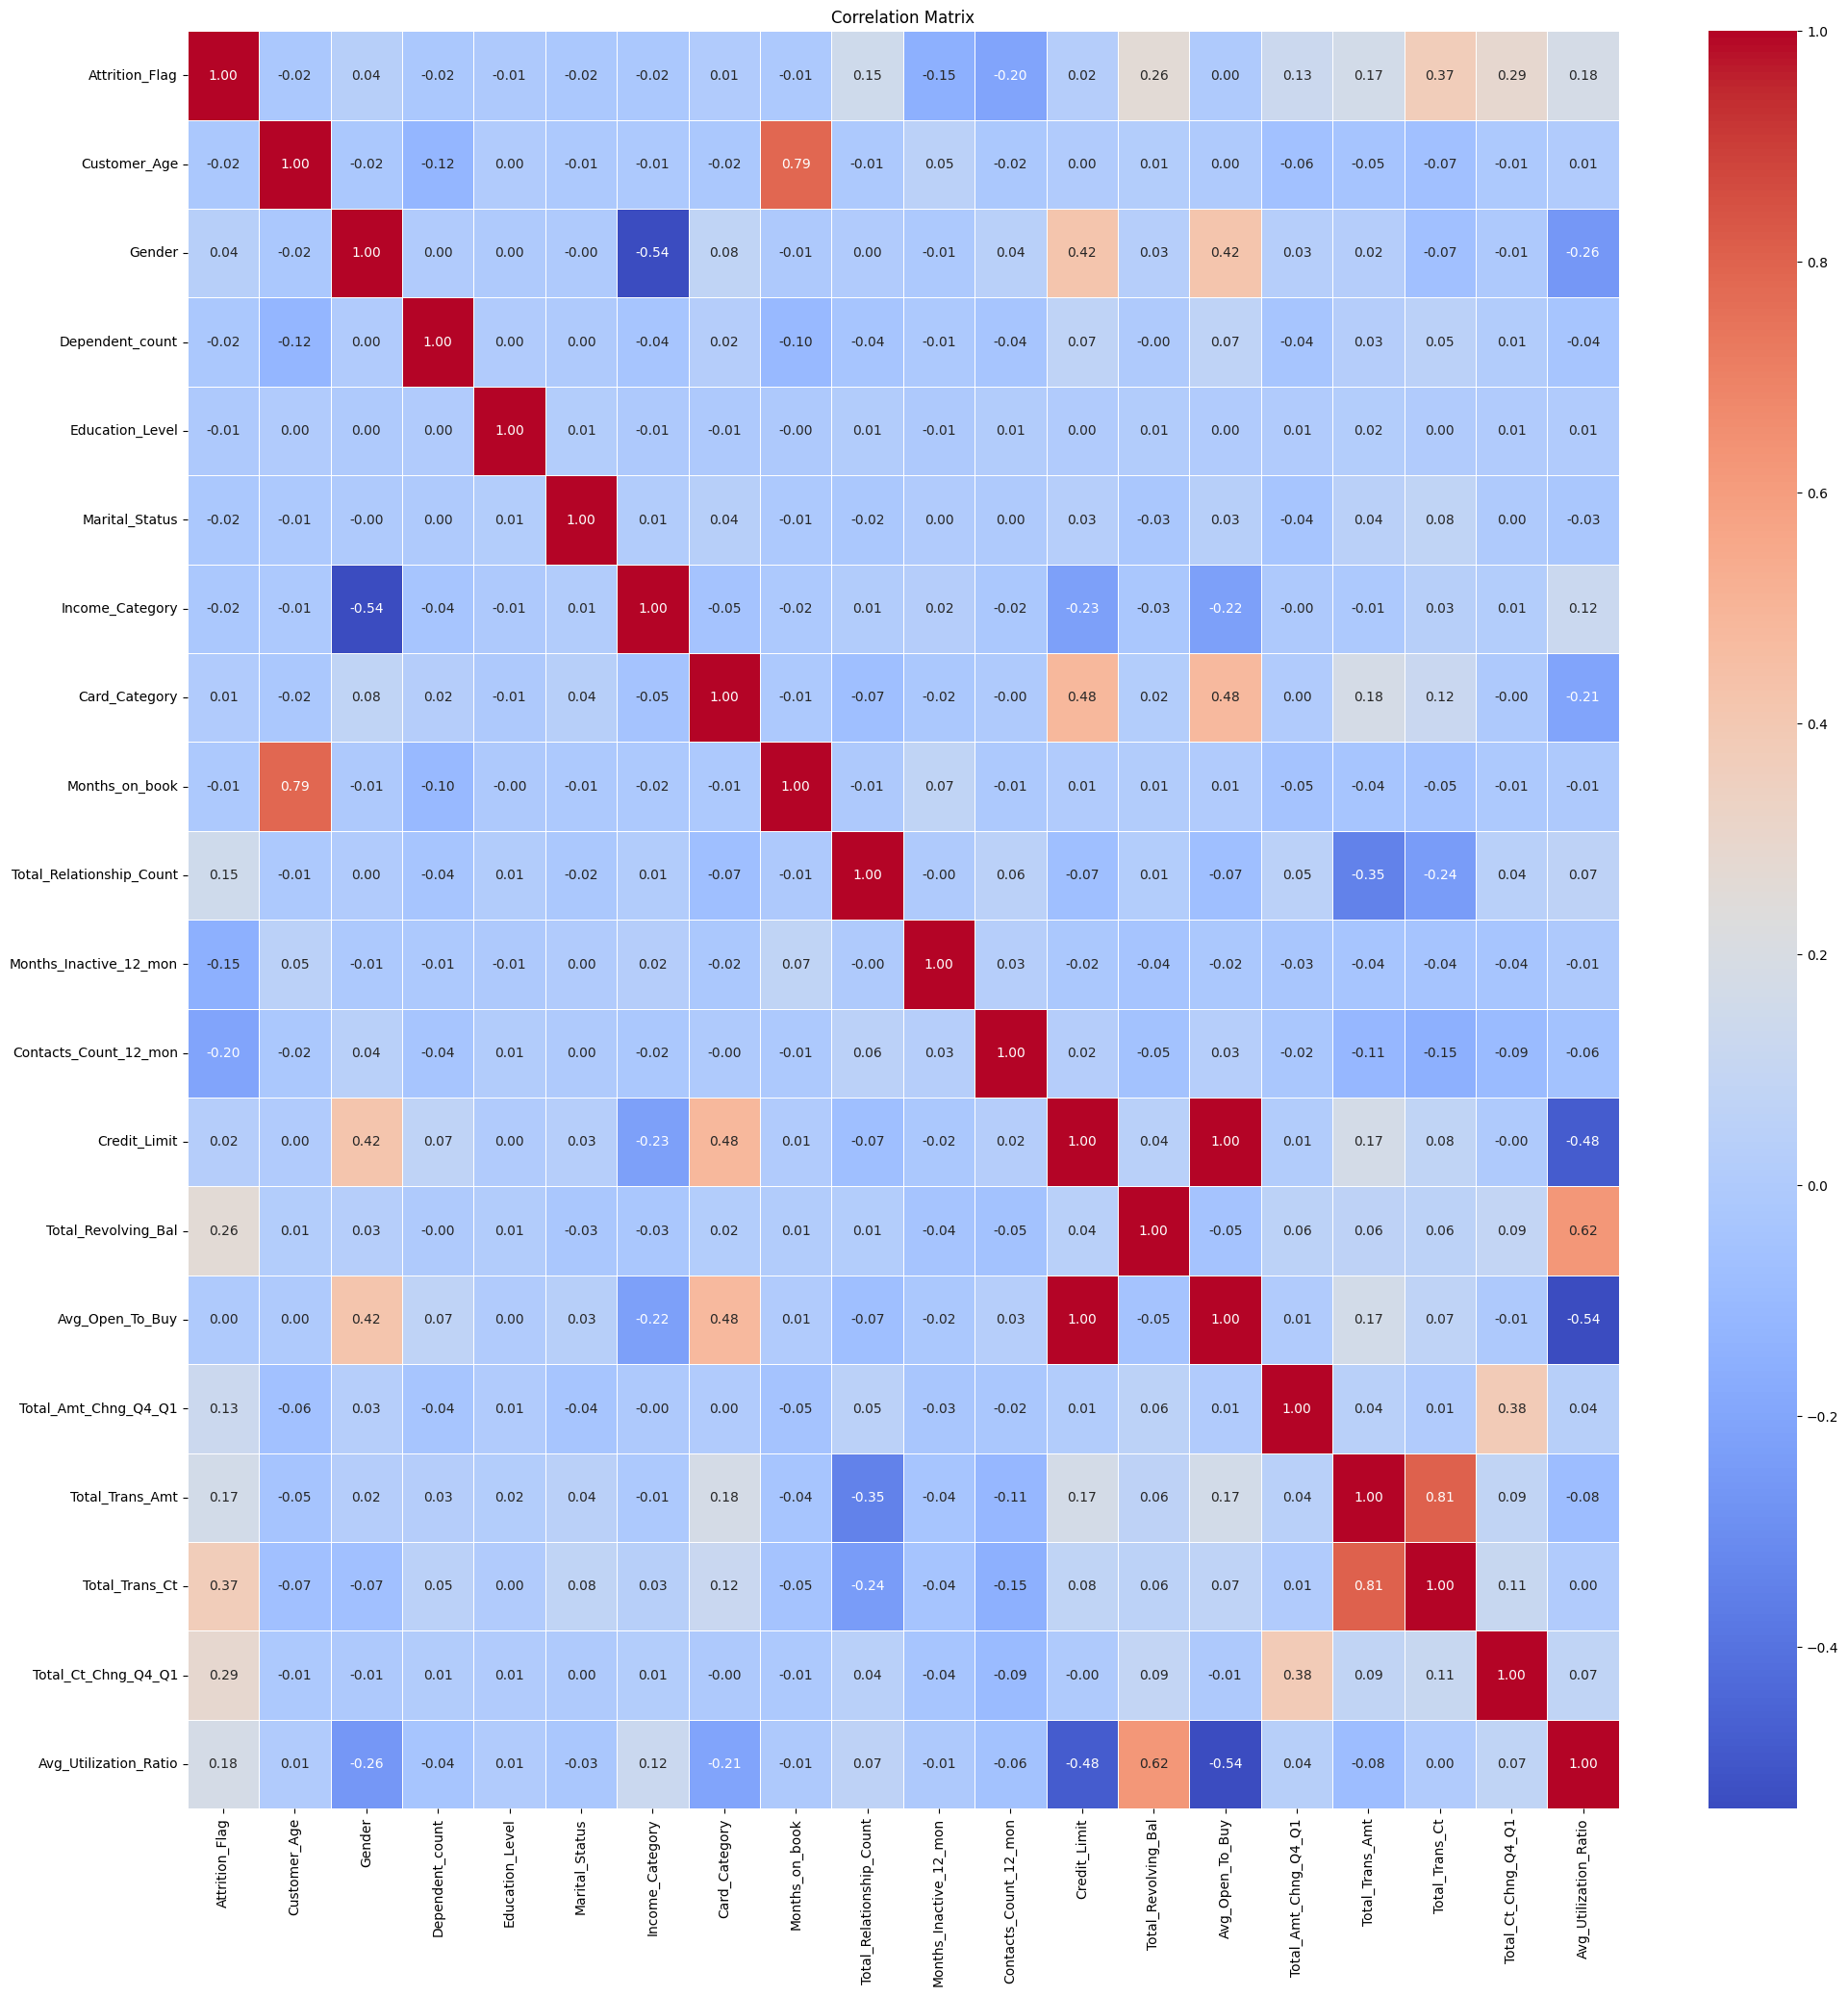

In [10]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize = (24,24))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()

**What we conclude from the correlation matrix:**<br>
Total Transactions Count is the strongest indicator of customer attrition: <br>
-> ~0.81, meaning customers who make more transactions generally spend more.

Credit behavior (Credit Limit, Utilization, and Open-to-Buy) is significantly related to spending patterns.<br>
-> Credit_Limit is positively correlated with Avg_Open_To_Buy (~0.48) & Total_Trans_Amt (~0.42), meaning customers with higher credit limits tend to have higher purchasing power and spending amounts.<br>
-> Credit_Limit is negatively correlated with Avg_Utilization_Ratio (~-0.48), implying that customers with high credit limits tend to have lower credit utilization rates.

Age and account tenure are strongly related, as expected.<br>
-> Customer_Age and Months_on_book have a strong correlation (~0.79), which makes sense because older customers have likely been with the company for a longer time.
_________

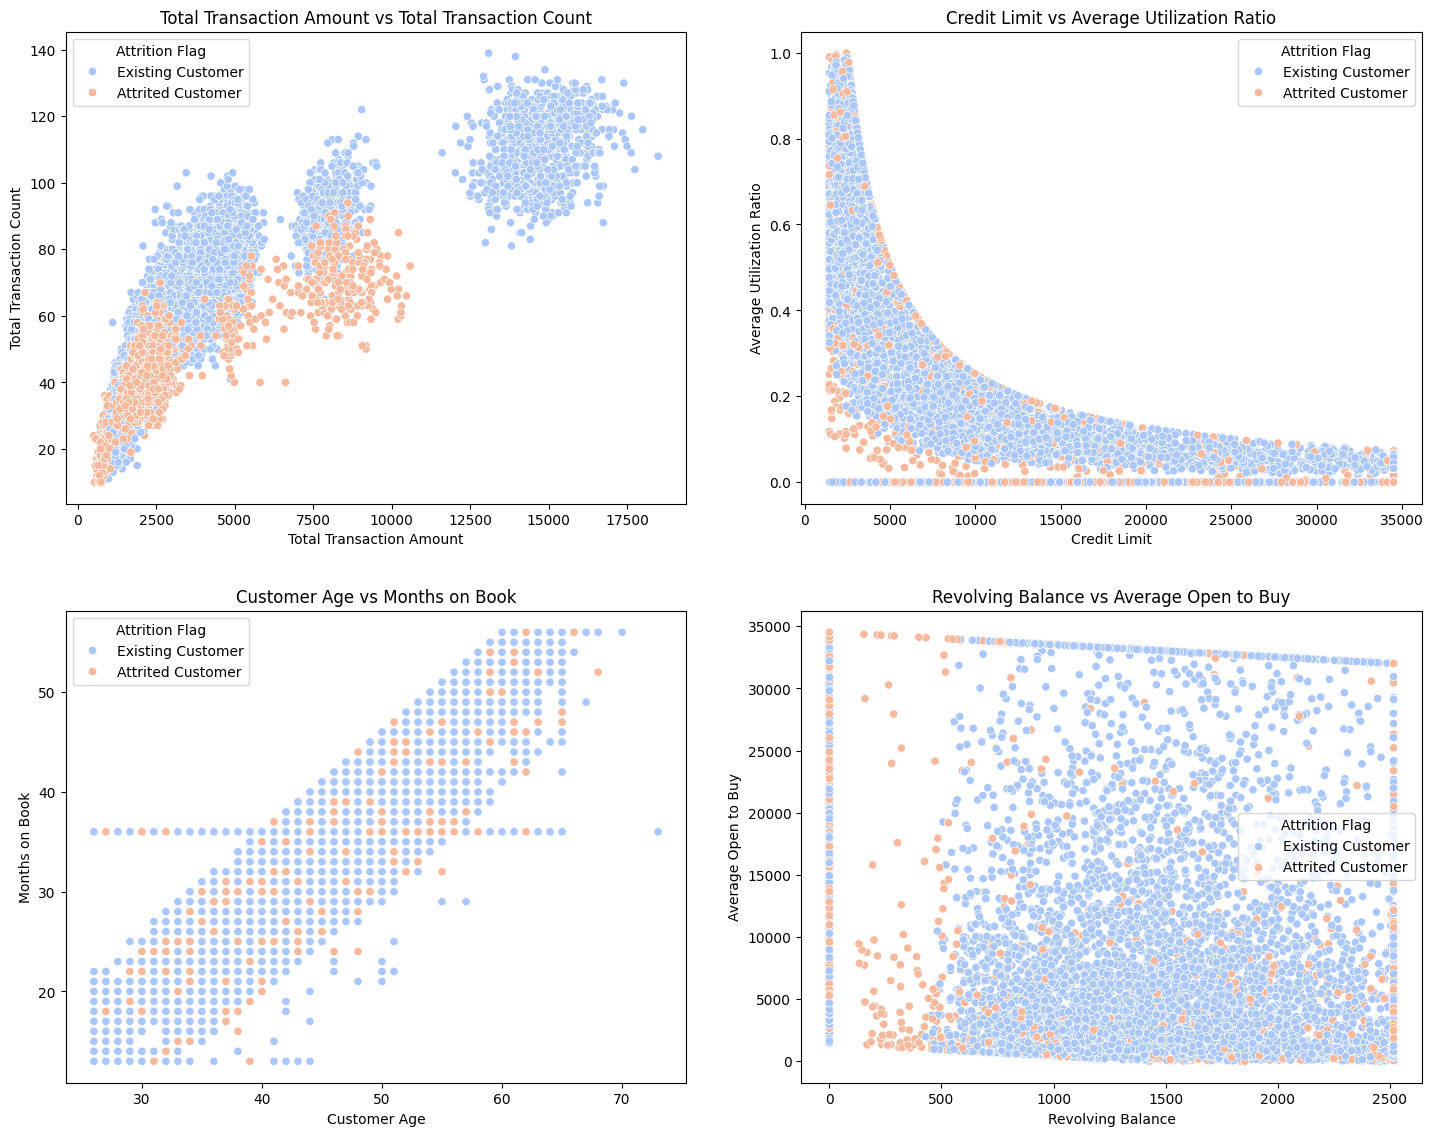

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plotting the relationship between Total Transaction Amount and Total Transaction Count
sns.scatterplot(data=df, x='Total_Trans_Amt', y='Total_Trans_Ct', hue='Attrition_Flag', palette='coolwarm', ax=axes[0, 0])
axes[0, 0].set_title('Total Transaction Amount vs Total Transaction Count')
axes[0, 0].set_xlabel('Total Transaction Amount')
axes[0, 0].set_ylabel('Total Transaction Count')
axes[0, 0].legend(title='Attrition Flag')

# Plotting the relationship between Credit Limit and Average Utilization Ratio
sns.scatterplot(data=df, x='Credit_Limit', y='Avg_Utilization_Ratio', hue='Attrition_Flag', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Credit Limit vs Average Utilization Ratio')
axes[0, 1].set_xlabel('Credit Limit')
axes[0, 1].set_ylabel('Average Utilization Ratio')
axes[0, 1].legend(title='Attrition Flag')

# Plotting the relationship between Customer Age and Months on Book
sns.scatterplot(data=df, x='Customer_Age', y='Months_on_book', hue='Attrition_Flag', palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Customer Age vs Months on Book')
axes[1, 0].set_xlabel('Customer Age')
axes[1, 0].set_ylabel('Months on Book')
axes[1, 0].legend(title='Attrition Flag')

# Plotting the relationship between Revolving Balance  and Average Open to Buy
sns.scatterplot(data=df, x='Total_Revolving_Bal', y='Avg_Open_To_Buy', hue='Attrition_Flag', palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Revolving Balance vs Average Open to Buy')
axes[1, 1].set_xlabel('Revolving Balance')
axes[1, 1].set_ylabel('Average Open to Buy')
axes[1, 1].legend(title='Attrition Flag')

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)
plt.show()

**Conclusion** <br>
Customers who has less transactions and have lower total spending are more likely to attrite. <br>
Higher credit utilization ratios and lower credit limits correlate with a higher likelihood of attrition.<br>
Shorter tenure customers may be at a higher risk of attrition.<br>
Customers with lower available credit (open to buy) might be more prone to leaving.
__________________

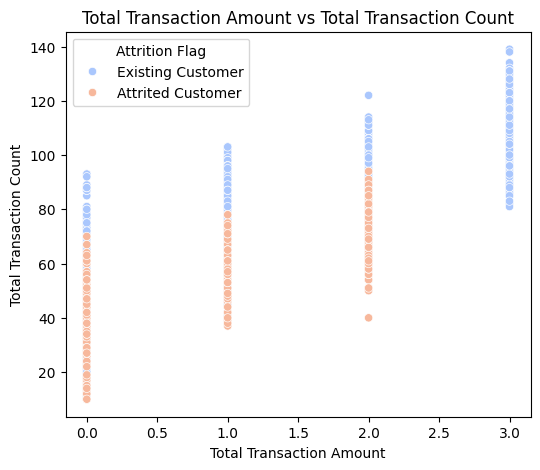

In [12]:
# Bining Total Transaction Amount
bins = [0, 3000, 6250, 11250, 20000]
labels = [0, 1, 2, 3]

# Create a new column 'Total_Trans_Amt_Binned' with binned values
df['Total_Trans_Amt_Binned'] = pd.cut(df['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows to verify the new column
df['Total_Trans_Amt_Binned'].describe() 

# Create a new figure and axes for the new plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the relationship between Total Transaction Amount and Total Transaction Count
sns.scatterplot(data=df, x='Total_Trans_Amt_Binned', y='Total_Trans_Ct', hue='Attrition_Flag', palette='coolwarm', ax=ax)
ax.set_title('Total Transaction Amount vs Total Transaction Count')
ax.set_xlabel('Total Transaction Amount')
ax.set_ylabel('Total Transaction Count')
ax.legend(title='Attrition Flag')

plt.show()

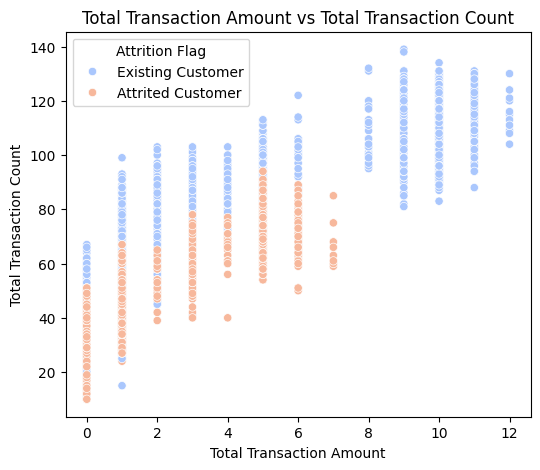

In [13]:
import numpy as np
# Automatically determine the number of bins using Sturges' formula
num_bins = int(np.ceil(1 + np.log2(df['Total_Trans_Amt'].nunique())))

# Create bins and labels
bins = np.linspace(df['Total_Trans_Amt'].min(), df['Total_Trans_Amt'].max(), num_bins)
labels = range(num_bins - 1)

# Create a new column 'Total_Trans_Amt_Binned' with binned values
df['Total_Trans_Amt_Binned'] = pd.cut(df['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows to verify the new column
df['Total_Trans_Amt_Binned'].describe() 

fig, ax = plt.subplots(figsize=(6, 5))

# Plotting the relationship between Total Transaction Amount and Total Transaction Count
sns.scatterplot(data=df, x='Total_Trans_Amt_Binned', y='Total_Trans_Ct', hue='Attrition_Flag', palette='coolwarm', ax=ax)
ax.set_title('Total Transaction Amount vs Total Transaction Count')
ax.set_xlabel('Total Transaction Amount')
ax.set_ylabel('Total Transaction Count')
ax.legend(title='Attrition Flag')

plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_29316\1259522702.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Attrition Flag')


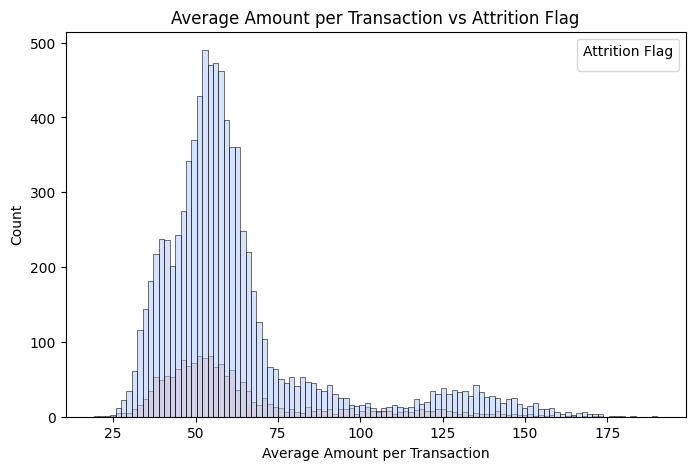

In [14]:
#average amount per transaction
AmtPreTrans = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
df['AmtPreTrans'] = AmtPreTrans
df['AmtPreTrans'].describe()
df['AmtPreTrans'].value_counts()

# Create a new figure and axes for the scatter plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=df, x='AmtPreTrans', hue='Attrition_Flag', palette='coolwarm', ax=ax)
ax.set_title('Average Amount per Transaction vs Attrition Flag')
ax.set_xlabel('Average Amount per Transaction')
ax.legend(title='Attrition Flag')

plt.show()

C:\Users\owner\AppData\Local\Temp\ipykernel_29316\3501079186.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Attrition Flag')


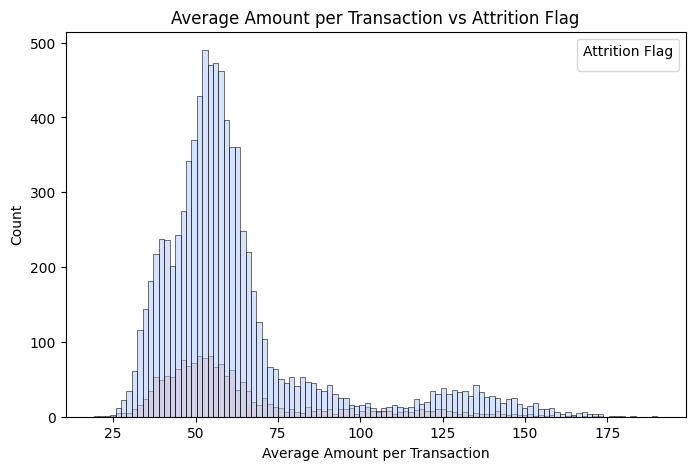

In [15]:
credit_capacity = df['Credit_Limit'] - df['Total_Revolving_Bal']
#average amount per transaction
AmtPreTrans = df['Total_Trans_Amt'] / df['Total_Trans_Ct']
df['AmtPreTrans'] = AmtPreTrans
df['AmtPreTrans'].describe()
df['AmtPreTrans'].value_counts()

# Create a new figure and axes for the scatter plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=df, x='AmtPreTrans', hue='Attrition_Flag', palette='coolwarm', ax=ax)
ax.set_title('Average Amount per Transaction vs Attrition Flag')
ax.set_xlabel('Average Amount per Transaction')
ax.legend(title='Attrition Flag')

plt.show()

**Conclusion** <br>
Customers with lower transaction counts and transaction amounts are more likely to attrite. <br>

**Suggestion** <br>
Encouraging higher engagement and transaction volume could help reduce attrition.
_________

**Outliers Detection and removal**

In [16]:
import numpy as np
import pandas as pd

numerical_features = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 
                      'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                      'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Q1 = df_encoded[numerical_features].quantile(0.25)
Q3 = df_encoded[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_encoded[numerical_features] < lower_bound) | (df_encoded[numerical_features] > upper_bound))

outlier_counts = outliers.sum()
print("\nNumber of Outliers in Each Feature:")
print(outlier_counts)

df_no_outliers = df_encoded[~outliers.any(axis=1)].copy()

print(f"\nOriginal dataset size: {df_encoded.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")

#df_encoded = df_no_outliers


Number of Outliers in Each Feature:
Customer_Age               2
Months_on_book           386
Credit_Limit             984
Total_Revolving_Bal        0
Avg_Open_To_Buy          963
Total_Amt_Chng_Q4_Q1     396
Total_Trans_Amt          896
Total_Trans_Ct             2
Total_Ct_Chng_Q4_Q1      394
Avg_Utilization_Ratio      0
dtype: int64

Original dataset size: (10127, 20)
After removing outliers: (7509, 20)


**Updated on outlier removal**

After our interim report we realize that the outliers are quite important to out dataset, so we decided to leave the outliers be and not remove them at all.

-------------------------

# Smoothing

**Smoothing with SMOTE(synthetic minority oversampling technique)**

SMOTE helps balance imbalanced datasets by generating synthetic samples for the minority class.

Compare to our previous work, it doesn't just simply duplicate samples (like random oversampling) but creates new, plausible data points.

The resampled dataset has an equal number of samples for both classes, improving model performance on the minority class.

In [28]:
from imblearn import over_sampling
# from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target variable
X = df_encoded.drop(columns=['Attrition_Flag'])
y = df_encoded['Attrition_Flag']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after applying SMOTE
print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

# Convert resampled data back to DataFrame
df_encoded = pd.DataFrame(X_resampled, columns=X.columns)
df_encoded['Attrition_Flag'] = y_resampled

# Display the first few rows of the resampled DataFrame
df_encoded.head()

ModuleNotFoundError: No module named 'imblearn'

By applying SMOTE the performence of Naïve Bayes and decision tree, it shows a significant decrease, but have inhenced the overall performence over XGBosst and RandomeForest.

And since SMOTE inhenceed the performence of the better model, we will apply SMOTE in preprocessing. 

**Conclusion for smoothed data** <br>

Compare with the RandomForest model without smoothing data, smoothed data have better performence over Accuracy (1.5% better) and Precision(2% better).
However with somoothing the recall have droped for 2%. 

--------------

# Features Selection

Using decision tree to find the features that infulence the model, and use top infulencial features to train model for noise reducing. 

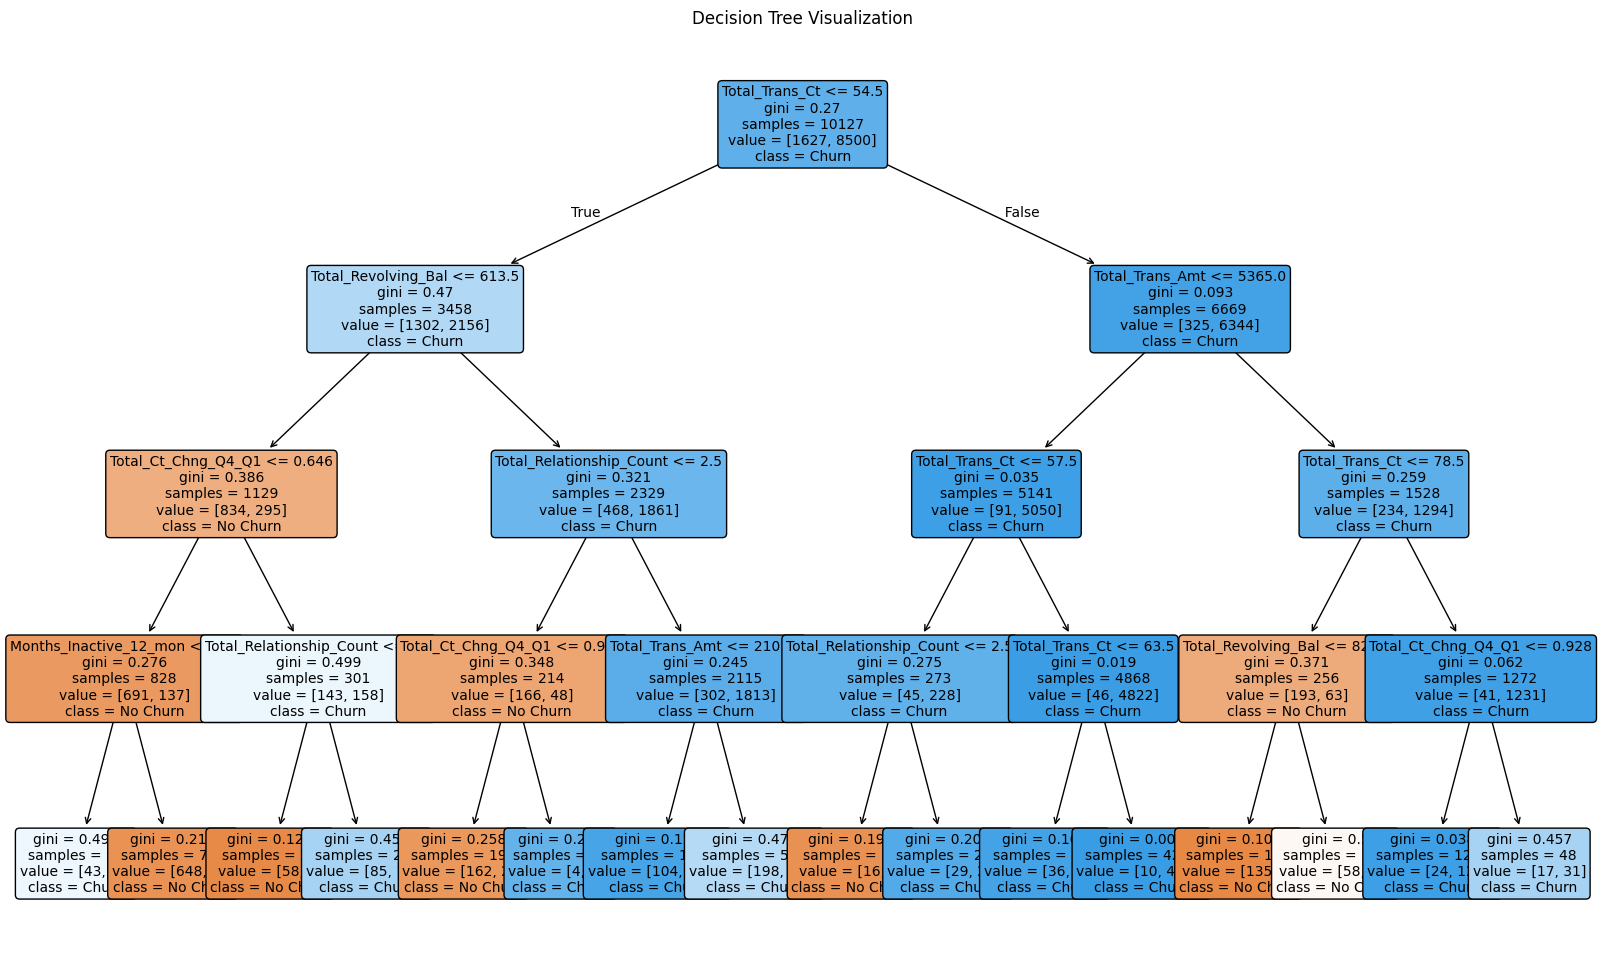


Top 10 Important Features:
                     Feature  Importance
16            Total_Trans_Ct    0.445114
12       Total_Revolving_Bal    0.283658
8   Total_Relationship_Count    0.127984
15           Total_Trans_Amt    0.074810
17       Total_Ct_Chng_Q4_Q1    0.052694
9     Months_Inactive_12_mon    0.015740
0               Customer_Age    0.000000
2            Dependent_count    0.000000
1                     Gender    0.000000
3            Education_Level    0.000000


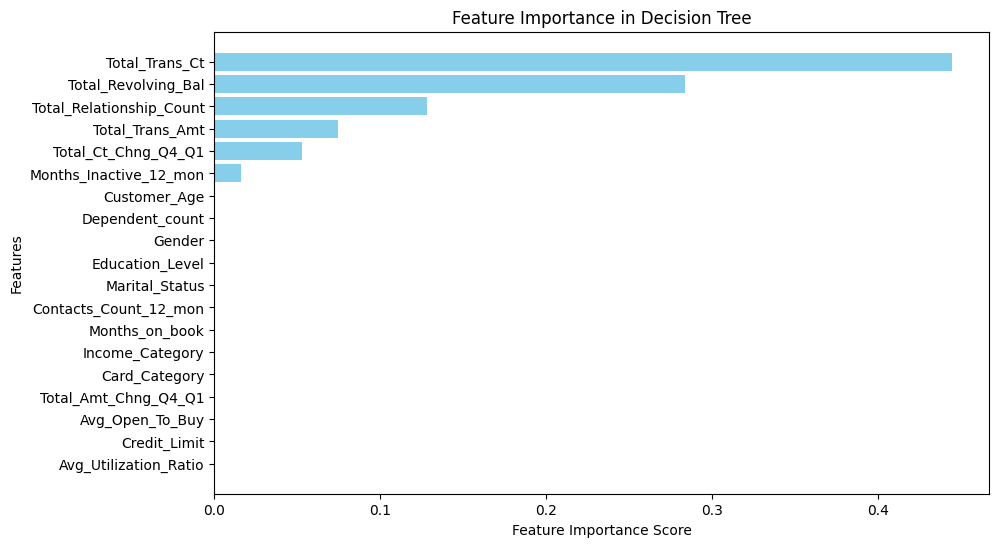

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# train a Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)  # set max_depth to 4 to avoid overfitting
tree_model.fit(X, y)

# visualize the Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(tree_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Calculate Feature Importance
feature_importances = tree_model.feature_importances_

# Create a DataFrame 
top_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
top_importance_df = top_importance_df.sort_values(by='Importance', ascending=False)  # order by importance

#df_encoded = top_importance_df

# print top 10 important features
print("\nTop 10 Important Features:")
print(top_importance_df.head(10))

# display the Feature Importance
plt.figure(figsize=(8,5))
plt.barh(top_importance_df['Feature'], top_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # invert y-axis to show the most important feature on top
plt.show()

**Conclusion**<br>
For RandomeForest model, removeing the non-importannt features have little or non infulence the overall performece of model. 

------

# Model Performance Evaluation

Now we use different models to test out the datatset.

**Gaussian**

Starting from a simple model, we have:


Overall Performance for Naïve Bayes:
Mean Accuracy: 0.8106
Mean Precision: 0.8331
Mean Recall: 0.7771

Mean RMSE: 0.4351
Mean R^2: 0.8106

Overall Confusion Matrix for Naïve Bayes:
[[7176 1324]
 [1895 6605]]


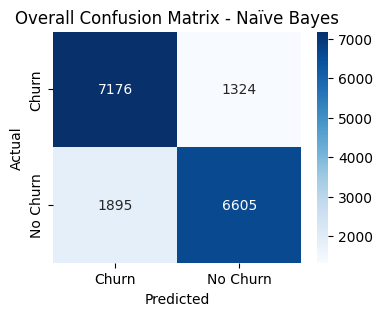

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define Naïve Bayes Model
nb_model = GaussianNB()

#Stratified 5-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []
root_mean_squared_error = []
r_square = []


# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# start cross validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train Naive Bayes model
    nb_model.fit(X_train, y_train)

    # predict
    y_pred = nb_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # calculate R^2
    r2 = nb_model.score(X_test, y_test)
    
    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    root_mean_squared_error.append(rmse)
    r_square.append(r2)

    # add Confusion Matrix together
    overall_cm += cm

   

# average performance
print("\nOverall Performance for Naïve Bayes:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")
print(f"\nMean RMSE: {np.mean(root_mean_squared_error):.4f}")
print(f"Mean R^2: {np.mean(r_square):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for Naïve Bayes:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - Naïve Bayes")
plt.show()

**Decision Tree**


Overall Performance for Decision Tree:
Mean Accuracy: 0.9071
Mean Precision: 0.9155
Mean Recall: 0.8971

Mean RMSE: 0.3048
Mean R^2: 0.9071

Overall Confusion Matrix for Decision Tree:
[[7796  704]
 [ 875 7625]]


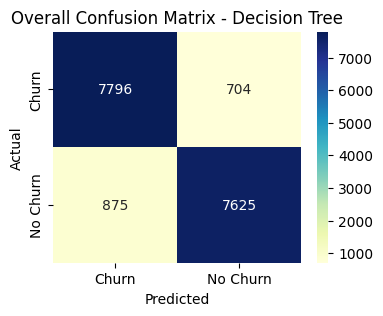

In [31]:
from sklearn.tree import DecisionTreeClassifier

# define tree model（use linear kernel）
tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)  # set max_depth to 4 to avoid overfitting

#Stratified 5-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []
root_mean_squared_error = []
r_square = []


# initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
            'Marital_Status', 'Income_Category', 'Card_Category', 
            'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
            'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
            'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train Naive Bayes model
    tree_model.fit(X_train, y_train)

    # predict
    y_pred = tree_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # calculate R^2
    r2 = tree_model.score(X_test, y_test)
    
    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    root_mean_squared_error.append(rmse)
    r_square.append(r2)

    # add Confusion Matrix together
    overall_cm += cm

# calculate average performance
print("\nOverall Performance for Decision Tree:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")
print(f"\nMean RMSE: {np.mean(root_mean_squared_error):.4f}")
print(f"Mean R^2: {np.mean(r_square):.4f}")

# print Overall Confusion Matrix
print("\nOverall Confusion Matrix for Decision Tree:")
print(overall_cm)

# visualize Overall Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - Decision Tree")
plt.show()

**XGBoost**


Overall Performance for XGBoost:
Mean Accuracy: 0.9830
Mean Precision: 0.9885
Mean Recall: 0.9774

Mean RMSE: 0.2174
Mean R^2: 0.9451

Overall Confusion Matrix for XGBoost:
[[8403   97]
 [ 192 8308]]


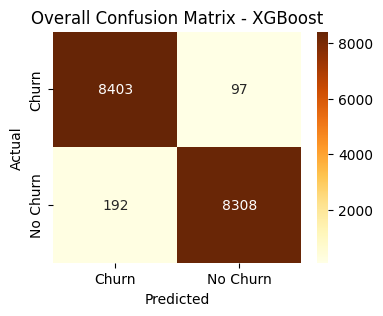

In [ ]:
from xgboost import XGBClassifier

# Define XGBoost Model
xgb_model = XGBClassifier(eval_metric='logloss')

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# Initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# Make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
      'Marital_Status', 'Income_Category', 'Card_Category', 
      'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
      'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
      'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
      'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# Start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train Naive Bayes model
    xgb_model.fit(X_train, y_train)

    # predict
    y_pred = xgb_model.predict(X_test)

    # calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # calculate R^2
    r2 = xgb_model.score(X_test, y_test)
    
    # store results
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    conf_matrices.append(cm)

    root_mean_squared_error.append(rmse)
    r_square.append(r2)

    # add Confusion Matrix together
    overall_cm += cm

# Calculate average performance
print("\nOverall Performance for XGBoost:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")
print(f"\nMean RMSE: {np.mean(root_mean_squared_error):.4f}")
print(f"Mean R^2: {np.mean(r_square):.4f}")

# Print Overall Confusion Matrix
print("\nOverall Confusion Matrix for XGBoost:")
print(overall_cm)

# Visualize Overall Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - XGBoost")
plt.show()


**RandomeForest**


Overall Performance for RandomeForest :
Mean Accuracy: 0.9782
Mean Precision: 0.9880
Mean Recall: 0.9682

Mean RMSE: 0.1940
Mean R^2: 0.9561

Overall Confusion Matrix for RandomeForest :
[[8400  100]
 [ 270 8230]]


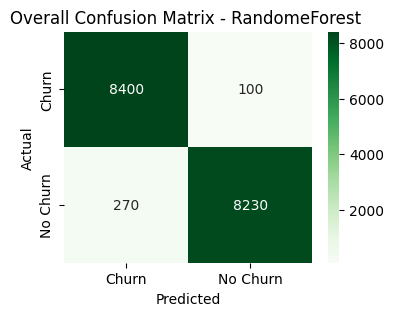

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Define RandomForest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Store cross validation results
accuracy_scores = []
precision_scores = []
recall_scores = []
conf_matrices = []

# Initialize Confusion Matrix
overall_cm = np.zeros((2, 2), dtype=int)

# Make sure X, y use df_encoded
X = df_encoded[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 
      'Marital_Status', 'Income_Category', 'Card_Category', 
      'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 
      'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
      'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 
      'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]
y = df_encoded['Attrition_Flag']

# Start cross validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # train Naive Bayes model
  rf_model.fit(X_train, y_train)

  # predict
  y_pred = rf_model.predict(X_test)

  # calculate metrics
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred, pos_label=1)
  rec = recall_score(y_test, y_pred, pos_label=1)
  cm = confusion_matrix(y_test, y_pred)

  # calculate RMSE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  # calculate R^2
  r2 = rf_model.score(X_test, y_test)
    
  # store results
  accuracy_scores.append(acc)
  precision_scores.append(prec)
  recall_scores.append(rec)
  conf_matrices.append(cm)

  root_mean_squared_error.append(rmse)
  r_square.append(r2)

  # add Confusion Matrix together
  overall_cm += cm

# Calculate average performance
print("\nOverall Performance for RandomeForest :")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Mean Precision: {np.mean(precision_scores):.4f}")
print(f"Mean Recall: {np.mean(recall_scores):.4f}")
print(f"\nMean RMSE: {np.mean(root_mean_squared_error):.4f}")
print(f"Mean R^2: {np.mean(r_square):.4f}")

# Print Overall Confusion Matrix
print("\nOverall Confusion Matrix for RandomeForest :")
print(overall_cm)

# Visualize Overall Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(overall_cm, annot=True, fmt="d", cmap="Greens", xticklabels=["Churn", "No Churn"], yticklabels=["Churn", "No Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Overall Confusion Matrix - RandomeForest ")
plt.show()


**Importance-Scores** <br>

Importance of each feature in different models put together for better visualization.


In [24]:
tree_model.fit(X_train, y_train)

# Rank the features by importance
importance_tr = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
importance_tr = importance_tr.sort_values(by='Importance', ascending=False)

print("\nRanked Feature Importances from Tree Model:")
print(importance_tr)


Ranked Feature Importances from Tree Model:
                     Feature  Importance
16            Total_Trans_Ct    0.609785
15           Total_Trans_Amt    0.167079
12       Total_Revolving_Bal    0.107164
8   Total_Relationship_Count    0.083703
17       Total_Ct_Chng_Q4_Q1    0.018742
13           Avg_Open_To_Buy    0.010080
0               Customer_Age    0.003446
2            Dependent_count    0.000000
1                     Gender    0.000000
5            Income_Category    0.000000
3            Education_Level    0.000000
10     Contacts_Count_12_mon    0.000000
9     Months_Inactive_12_mon    0.000000
7             Months_on_book    0.000000
6              Card_Category    0.000000
4             Marital_Status    0.000000
11              Credit_Limit    0.000000
14      Total_Amt_Chng_Q4_Q1    0.000000
18     Avg_Utilization_Ratio    0.000000


In [25]:
xgb_model.fit(X_train, y_train)

for i in range(X.shape[1]):
    # Rank the features by importance
    importance_xg = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
    importance_xg = importance_xg.sort_values(by='Importance', ascending=False)

print("\nRanked Feature Importances from XGBoost:")
print(importance_xg)


Ranked Feature Importances from XGBoost:
                     Feature  Importance
16            Total_Trans_Ct    0.332477
8   Total_Relationship_Count    0.123151
12       Total_Revolving_Bal    0.122211
15           Total_Trans_Amt    0.078930
1                     Gender    0.071955
17       Total_Ct_Chng_Q4_Q1    0.048209
14      Total_Amt_Chng_Q4_Q1    0.027384
0               Customer_Age    0.025806
5            Income_Category    0.024281
9     Months_Inactive_12_mon    0.024024
13           Avg_Open_To_Buy    0.022437
10     Contacts_Count_12_mon    0.019396
18     Avg_Utilization_Ratio    0.014220
11              Credit_Limit    0.013167
4             Marital_Status    0.012783
6              Card_Category    0.011624
3            Education_Level    0.011379
2            Dependent_count    0.008686
7             Months_on_book    0.007880


In [26]:
rf_model.fit(X_train, y_train)

for i in range(X.shape[1]):
    # Rank the features by importance 
    importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
    importance_rf = importance_rf.sort_values(by='Importance', ascending=False)

print("\nRanked Feature Importances from Random Forest:")
print(importance_rf)


Ranked Feature Importances from Random Forest:
                     Feature  Importance
16            Total_Trans_Ct    0.223210
15           Total_Trans_Amt    0.222730
12       Total_Revolving_Bal    0.105863
17       Total_Ct_Chng_Q4_Q1    0.089094
8   Total_Relationship_Count    0.062328
18     Avg_Utilization_Ratio    0.060808
14      Total_Amt_Chng_Q4_Q1    0.053359
11              Credit_Limit    0.026304
13           Avg_Open_To_Buy    0.025895
0               Customer_Age    0.025712
1                     Gender    0.022296
7             Months_on_book    0.016109
9     Months_Inactive_12_mon    0.015815
5            Income_Category    0.012415
10     Contacts_Count_12_mon    0.011651
3            Education_Level    0.009222
2            Dependent_count    0.008935
4             Marital_Status    0.006141
6              Card_Category    0.002114


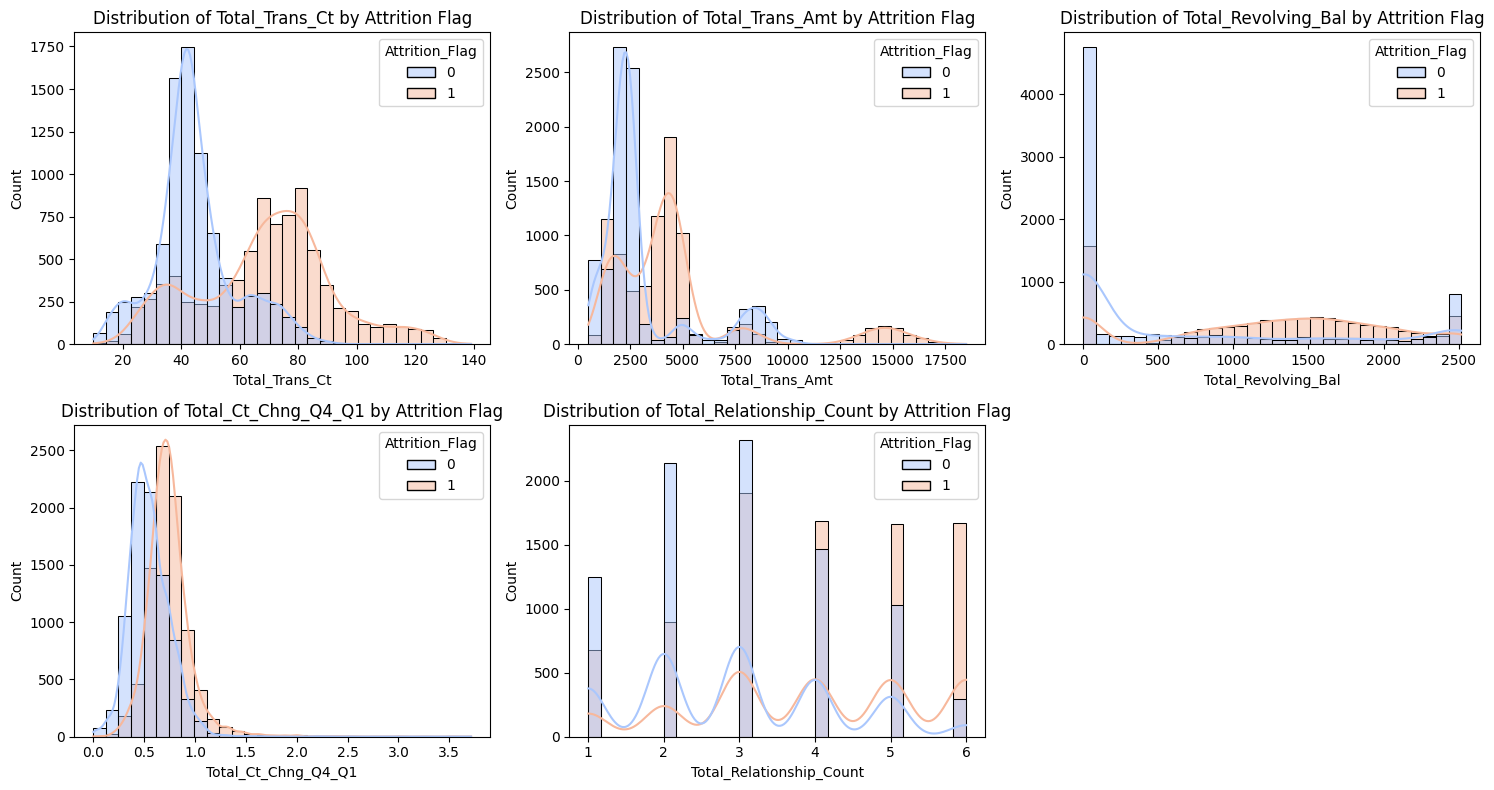

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# choose top 5 important features
top_n = 5
top_features = importance_rf.head(top_n)['Feature'].tolist()

# create a pairplot
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_encoded, x=feature, hue="Attrition_Flag", kde=True, bins=30, palette="coolwarm")
    plt.title(f"Distribution of {feature} by Attrition Flag")

plt.tight_layout()
plt.show()

# Hyperparameter tuning<br>
Use itertools to fine tuning the model to achieve the best performence.<br>
*Due fine tuning is time consuming, we will only fine turning XGBoost and Randome Forest model. 

XGBoost

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
import numpy as np

xgb_model = XGBClassifier(random_state=0)

param_grid = {
  #Number of gradient boosted trees. Equivalent to number of boosting rounds.
  'n_estimators': [300, 500, 1000],
  #Maximum tree depth for base learners.
  'max_depth': [2, 3, 5, 7],
  #Maximum number of leaves; 0 indicates no limit.
  #'max_leaves':[0],
  #Tree growing policy.
  #grow_policy': ['depthwise', 'lossguide'],
  #Boosting learning rate (lower = more accurate, larger = faster)
  'learning_rate': [0.01, 0.05, 0.1],
  #Specify which booster to use
  #'booster': ['gbtree', 'gblinear', 'dart'],
  #Specify which tree method to use. 
  #'tree_model': ['','DecisionTreeClassifier', 'RandomForestClassifier'],
  #Subsample ratio of the training instance.
  'subsample': [0.7, 0.8, 0.9],
  #Subsample ratio of columns when constructing each tree.
  'colsample_bytree': [0.8, 0.9, 1.0]
}

# Handle NaN and infinite values in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

# GridSearchCV 
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
scoring = {
    'accuracy': 'accuracy',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=skf, 
                           scoring=scoring, refit='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("\nBest accuracy found: ", grid_search.best_score_)
print("Best RMSE found: ", -grid_search.cv_results_['mean_test_neg_root_mean_squared_error'][grid_search.best_index_])
print("Best R^2 found: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])
print("Best index found: ", grid_search.best_index_)




Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.9}

Best accuracy found:  0.9827942472092693
Best RMSE found:  0.13106921298571697
Best R^2 found:  0.9311769867185048
Best index found:  278


1m16.5s<br>
Fitting 3 folds for each of 324 candidates, totalling 972 fits<br>
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.9}<br>

Best accuracy found:  0.9827942472092693<br>
Best RMSE found:  0.13106921298571697<br>
Best R^2 found:  0.9311769867185048<br>
Best index found:  278

For comparision<br>
XGBoost(without fine tuning):<br>
Mean Accuracy: 0.9830<br>
Mean Precision: 0.9885<br>
Mean Recall: 0.9774<br>

Mean RMSE: 0.2174<br>
Mean R^2: 0.9451<br>


code from professor

In [51]:
from itertools import product
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

def cross_val_score_model(params, X, y, n_folds=3):
    model = XGBRegressor(**params)
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)
    scores = cross_val_score(model, X, y, cv=skf, scoring='neg_mean_squared_error')
    return np.sqrt(-scores)

def grid_search(params_grid, X, y, n_folds=3):
        
    best_score = float('inf')
    best_std = float('inf')
    best_params = None
    results = []

    for values in product(*params_grid.values()):
        # Create parameter set
        params = dict(zip(params_grid.keys(), values))
        params['base_score'] = np.mean(y)
        params['random_state'] = 0
        
        print(f"Testing params: {params}")
        
        # Perform CV
        scores = cross_val_score_model(params, X, y, n_folds=n_folds)
        
        # Compute mean and std RMSE
        mean_rmse = np.mean(scores)
        std_rmse = np.std(scores)

        # Log the results
        results.append({
            "params": params,
            "mean_rmse": mean_rmse,
            "std_rmse": std_rmse,
            "scores": scores
        })

        print(f"Mean RMSE: {mean_rmse:.4f} (±{std_rmse:.4f})\n")

        # Update best params
        if mean_rmse < best_score:
            best_score = mean_rmse
            best_params = params
            best_std = std_rmse
            print("✅ -------NEW BEST------")

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    print(f"Best Params: {best_params}")
    print(f"\nBest RMSE mean: {best_score:.4f}")
    print(f"\nBest RMSE std: {best_std:.4f}")

    return best_params, results_df

# Define hyperparameter grid
param_grid = {
  #Number of gradient boosted trees. Equivalent to number of boosting rounds.
  'n_estimators': [300, 500, 1000],
  #Maximum tree depth for base learners.
  'max_depth': [2, 3, 5, 7],
  #Maximum number of leaves; 0 indicates no limit.
  #'max_leaves':[0],
  #Tree growing policy.
  #grow_policy': ['depthwise', 'lossguide'],
  #Boosting learning rate (lower = more accurate, larger = faster)
  'learning_rate': [0.01, 0.05, 0.1],
  #Specify which booster to use
  #'booster': ['gbtree', 'gblinear', 'dart'],
  #Specify which tree method to use. 
  #'tree_model': ['','DecisionTreeClassifier', 'RandomForestClassifier'],
  #Subsample ratio of the training instance.
  'subsample': [0.7, 0.8, 0.9],
  #Subsample ratio of columns when constructing each tree.
  'colsample_bytree': [0.8, 0.9, 1.0]
}

# Run grid search
best_params, results_df = grid_search(param_grid, X, y, n_folds=3)

# Save results to a CSV for further analysis
#results_df.to_csv("xgb_grid_search_results.csv", index=False)


Testing params: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.8, 'base_score': np.float64(0.5), 'random_state': 0}
Mean RMSE: 0.2929 (±0.0009)

✅ -------NEW BEST------
Testing params: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.7, 'colsample_bytree': 0.9, 'base_score': np.float64(0.5), 'random_state': 0}
Mean RMSE: 0.2928 (±0.0012)

✅ -------NEW BEST------
Testing params: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.7, 'colsample_bytree': 1.0, 'base_score': np.float64(0.5), 'random_state': 0}
Mean RMSE: 0.2927 (±0.0010)

✅ -------NEW BEST------
Testing params: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.8, 'base_score': np.float64(0.5), 'random_state': 0}
Mean RMSE: 0.2932 (±0.0010)

Testing params: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.01, 'subsample': 0.8, 'colsample_bytree': 0.9, 'base_score'

8m53.1s

Best Params: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.05, 'subsample': 0.7, 'colsample_bytree': 0.9, 'base_score': np.float64(0.5), 'random_state': 0}<br>

Best RMS
Best RMSE std: 0.0021<br>

Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_model = RandomForestClassifier(random_state=0)

param_grid = {
  #Number of gradient boosted trees. Equivalent to number of boosting rounds.
  'n_estimators': [500, 1000],
  #The function to measure the quality of a split.
  'criterion': ['gini', 'entropy', 'log_loss'],
  #Maximum tree depth for base learners.(default=None, best=None)
  #'max_depth': [10, None],
  #The minimum number of samples required to split an internal node
  'min_samples_split': [2, 5, 10],
  #The minimum number of samples required to be at a leaf node.
  'min_samples_leaf': [1, 2, 4],
  #Whether bootstrap samples are used when building trees.
  'bootstrap': [True, False]
}

# Handle NaN and infinite values in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())

# GridSearchCV 
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
scoring = {
    'accuracy': 'accuracy',
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'r2': 'r2'
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=skf, 
                           scoring=scoring, refit='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("\nBest accuracy found: ", grid_search.best_score_)
print("Best RMSE found: ", -grid_search.cv_results_['mean_test_neg_root_mean_squared_error'][grid_search.best_index_])
print("Best R^2 found: ", grid_search.cv_results_['mean_test_r2'][grid_search.best_index_])
print("Best index found: ", grid_search.best_index_)



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Best accuracy found:  0.9781620077477219
Best RMSE found:  0.14751235718831954
Best R^2 found:  0.9126480283713015
Best index found:  72


6m17.2s (critertion maybe time consuming?)<br>
Fitting 3 folds for each of 108 candidates, totalling 324 fits<br>
Best parameters found:  {'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}<br>

Best accuracy found:  0.9781620077477219<br>
Best RMSE found:  0.14751235718831954<br>
Best R^2 found:  0.9126480283713015<br>
Best index found:  72

For comparition<br>
RandomeForest(without fine tuning) :<br>
Mean Accuracy: 0.9782<br>
Mean Precision: 0.9880<br>
Mean Recall: 0.9682<br>

Mean RMSE: 0.1940<br>
Mean R^2: 0.9561<br>


**Conclusion**<br>
After hyperparameter tuning, XGBoost now have lower it's RMSE from 0.2174 to 0.1310, Randome Forest also decrease it's RMSE from 0.1940 to 0.1475. However this means after fine tuning XGBoost becomes the model that have best performence. <br>
It's also noticeble that using GridSearchCV requie much less runtime than using itertool while performe hyperparameter tuning under same param_grid and cross-validate setting.


# Conclusion